In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
usvideos_df = pd.read_csv(Path('./ETL/ETL1_columnscleaned.csv'))
usvideos_df.head()

,video_id,date_trending,date_interval,title,channel_title,category_id,date_published,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,1 days,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,0,0,0
1,1ZAPwfrtAFY,2017-11-14,1 days,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,0,0,0
2,5qpjK5DgCt4,2017-11-14,2 days,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0,0,0
3,puqaWrEC7tY,2017-11-14,1 days,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,0,0,0
4,d380meD0W0M,2017-11-14,2 days,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0,0,0


In [4]:
usvideos_df.dtypes

video_id                  object
date_trending             object
date_interval             object
title                     object
channel_title             object
category_id                int64
date_published            object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled          int64
ratings_disabled           int64
video_error_or_removed     int64
dtype: object

In [5]:
#trending_length = usvideos_df['video_id'].value_counts()
#trending_length

In [6]:
#df['Counts'] = df.groupby(['Color'])['Value'].transform('count')
#usvideos_df['trending_length'] = usvideos_df.groupby(by=['video_id'])['date_trending']['date_interval']['title']['channel_title']['category_id']['date_published']['tags']['views']['likes']['dislikes']['comment_count']['thumbnail_link']['comments_disabled']['ratings_disabled']['video_error_or_removed'].transform('count')
#usvideos_df['trending_length'] = 
#trending_length_df = pd.DataFrame(usvideos_df.groupby('video_id')['date_trending'].count())
#trending_length_df.head()
#trending_length_df.columns
usvideos_df['trending_duration']=usvideos_df.groupby(by='video_id')['video_id'].transform('count')
usvideos_df.head()

,video_id,date_trending,date_interval,title,channel_title,category_id,date_published,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,trending_duration
0,2kyS6SvSYSE,2017-11-14,1 days,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,0,0,0,7
1,1ZAPwfrtAFY,2017-11-14,1 days,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,0,0,0,7
2,5qpjK5DgCt4,2017-11-14,2 days,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0,0,0,7
3,puqaWrEC7tY,2017-11-14,1 days,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,0,0,0,7
4,d380meD0W0M,2017-11-14,2 days,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0,0,0,6


## Building a Multiple Regression Model with Initial set of features

In [7]:
y = usvideos_df["trending_duration"]
y.head()

0    7
1    7
2    7
3    7
4    6
Name: trending_duration, dtype: int64

In [8]:
X = usvideos_df.drop(columns=["trending_duration","video_id","date_trending","date_interval","title","channel_title","date_published","tags","thumbnail_link","comments_disabled","ratings_disabled","video_error_or_removed"])
X.head()

,category_id,views,likes,dislikes,comment_count
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181
3,24,343168,10172,666,2146
4,24,2095731,132235,1989,17518


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
compare_df =  pd.DataFrame({"Prediction" : y_pred, "Actual" : y_test})
compare_df.head(10)

,Prediction,Actual
6673,9.333514,6
17040,9.229076,9
35172,9.397208,17
33867,9.844997,20
11746,9.592929,4
24730,9.865716,13
32588,9.658281,8
12016,16.541872,7
14132,9.475020,6
31928,9.987190,17


## Scaling Data

In [16]:
cleanvideos_df = usvideos_df.drop(columns=["video_id","date_trending","date_interval","title","channel_title","date_published","tags","thumbnail_link","comments_disabled","ratings_disabled","video_error_or_removed","category_id"])
cleanvideos_df.head()

,views,likes,dislikes,comment_count,trending_duration
0,748374,57527,2966,15954,7
1,2418783,97185,6146,12703,7
2,3191434,146033,5339,8181,7
3,343168,10172,666,2146,7
4,2095731,132235,1989,17518,6


In [17]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [18]:
cleanvideos_scaled = data_scaler.fit_transform(cleanvideos_df)

In [19]:
cleanvideos_scaled[:5]

array([[-0.21806945, -0.07313665, -0.02567749,  0.20056613, -0.48409997],
       [ 0.00784395,  0.10013126,  0.08386681,  0.11371074, -0.48409997],
       [ 0.11234064,  0.31355077,  0.05606736, -0.00710135, -0.48409997],
       [-0.27287128, -0.28003316, -0.10490764, -0.16833552, -0.48409997],
       [-0.03584701,  0.25326657, -0.05933308,  0.24235076, -0.65759385]])

In [21]:
scaledvideos_df = pd.DataFrame(data = cleanvideos_scaled, columns=["views","likes","dislikes","comment_count","trending_duration"])
scaledvideos_df.head()

,views,likes,dislikes,comment_count,trending_duration
0,-0.218069,-0.073137,-0.025677,0.200566,-0.484100
1,0.007844,0.100131,0.083867,0.113711,-0.484100
2,0.112341,0.313551,0.056067,-0.007101,-0.484100
3,-0.272871,-0.280033,-0.104908,-0.168336,-0.484100
4,-0.035847,0.253267,-0.059333,0.242351,-0.657594


## Inspecting Relation between Trending Duration and each feature

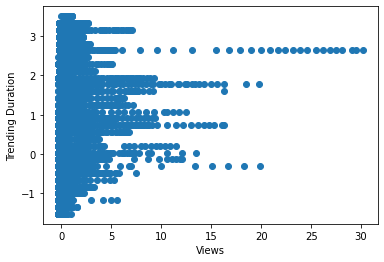

In [25]:
plt.scatter(scaledvideos_df.views, scaledvideos_df.trending_duration)
plt.xlabel('Views')
plt.ylabel('Trending Duration')
plt.show()

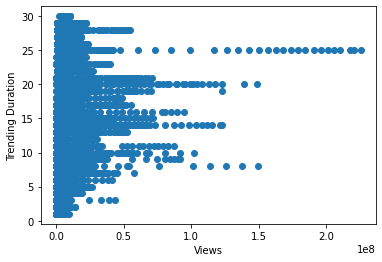

In [26]:
plt.scatter(cleanvideos_df.views, cleanvideos_df.trending_duration)
plt.xlabel('Views')
plt.ylabel('Trending Duration')
plt.show()

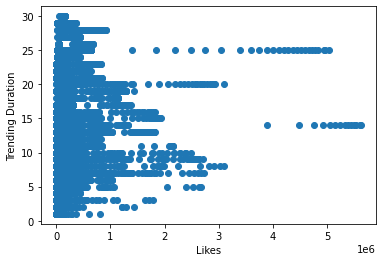

In [27]:
plt.scatter(cleanvideos_df.likes, cleanvideos_df.trending_duration)
plt.xlabel('Likes')
plt.ylabel('Trending Duration')
plt.show()

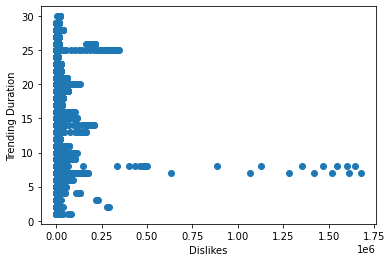

In [28]:
plt.scatter(cleanvideos_df.dislikes, cleanvideos_df.trending_duration)
plt.xlabel('Dislikes')
plt.ylabel('Trending Duration')
plt.show()

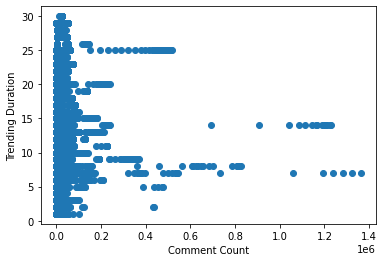

In [29]:
plt.scatter(cleanvideos_df.comment_count, cleanvideos_df.trending_duration)
plt.xlabel('Comment Count')
plt.ylabel('Trending Duration')
plt.show()

In [31]:
usvideos_df.to_csv("../TrendingDuration.csv")

In [35]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 score is", score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred)))


r2 score is 0.06594734413339132
mean_sqrd_error is== 31.011291797881345
root_mean_squared error of is== 5.568778303890482


## Applying Linear regression on Scaled Data

In [36]:
y = scaledvideos_df["trending_duration"]
y.head()

0   -0.484100
1   -0.484100
2   -0.484100
3   -0.484100
4   -0.657594
Name: trending_duration, dtype: float64

In [37]:
X = scaledvideos_df.drop(columns=["trending_duration"])
X.head()

,views,likes,dislikes,comment_count
0,-0.218069,-0.073137,-0.025677,0.200566
1,0.007844,0.100131,0.083867,0.113711
2,0.112341,0.313551,0.056067,-0.007101
3,-0.272871,-0.280033,-0.104908,-0.168336
4,-0.035847,0.253267,-0.059333,0.242351


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)
compare_df =  pd.DataFrame({"Prediction" : y_pred, "Actual" : y_test})
compare_df.head(10)

,Prediction,Actual
6673,-0.069812,-0.657594
17040,-0.075233,-0.137112
35172,-0.040129,1.250839
33867,0.009029,1.771320
11746,-0.016241,-1.004582
24730,0.035336,0.556863
32588,-0.000958,-0.310606
12016,1.178014,-0.484100
14132,-0.032200,-0.657594
31928,0.049162,1.250839


In [43]:
score=r2_score(y_test,y_pred)
print("r2 score is", score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is 0.06363134451005337
mean_sqrd_error is== 0.935758205955645
root_mean_squared error of is== 0.9673459598073716
